Proje hakkında bilgi verilmesi
-Projenin konusu, amacı, değişkenlerinin belirtilmesi,
-Hangi değişkenin bağımlı, hangi değişkenin ya da değişkenlerin bağımsız
değişken olduğunun belirtilmesi,
-Veri setinin açıklanması.

1) Proje Hakkında Bilgi
Projenin Konusu:
Bu projede, bireylerin çeşitli sağlık göstergelerine göre kalp hastalığına yakalanma durumları incelenmektedir.

Projenin Amacı:
Kalp hastalığı riskini etkileyen faktörleri analiz ederek, hangi değişkenlerin bu hastalıkla ilişkili olduğunu belirlemek ve çeşitli istatistiksel analizlerle bu ilişkiyi test etmektir.

Veri Seti:
Kullanılan veri seti Heart Disease UCI veri setidir. Bu veri seti, Cleveland klinik merkezinden toplanmış ve bireylerin yaş, cinsiyet, kan basıncı, kolesterol gibi sağlık göstergeleri ile kalp hastalığına sahip olup olmadıklarını içermektedir.

Bağımlı Değişken (Y):

target: Kalp hastalığı durumu (1 = hasta, 0 = sağlıklı)

Bağımsız Değişkenler (X):

age: Yaş

sex: Cinsiyet

cp: Göğüs ağrısı tipi

trestbps: İstirahat kan basıncı

chol: Serum kolestrol

fbs: Açlık kan şekeri

restecg: Dinlenme elektrokardiyografik sonuçlar

thalach: Maksimum kalp atış hızı

exang: Egzersize bağlı angina

oldpeak: ST depresyonu

slope: Egzersize bağlı ST segment eğimi

ca: Floroskopi ile renklendirilen ana damar sayısı

thal: Talasemi tipi

2) Gerekli kütüphanelerin yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


📦 Kullanılan Kütüphaneler ve Görevleri
Kütüphane	Görevi
pandas	                                   Veri setini yüklemek, tablo şeklinde işlemek (DataFrame yapısı ile)
numpy	                                   Sayısal işlemler ve dizilerle çalışma
matplotlib.pyplot	                       Grafik çizimi (histogram, scatter plot, vs.)
seaborn	                                   Matplotlib’e dayalı daha şık ve kolay grafikler
scipy.stats	                               İstatistiksel testler (hipotez testi, güven aralığı, vs.)
statsmodels.api	                           Regresyon ve ANOVA gibi ileri düzey istatistiksel modellemeler
sklearn.linear_model.LinearRegression	   Makine öğrenmesi için basit doğrusal regresyon modeli oluşturma
sklearn.metrics	                           Regresyon sonuçlarını değerlendirmek için hata ve başarı metrikleri (örneğin MSE, R²)

3) Veri setinin yüklenmesi
-Veri setinin incelenmesi (yani head(), tail() vb. kodlarla veri setinin keşfedilmesi),
-Veri setinin betimsel istatistiklerinin bulunması ve yorumlanması.

In [3]:
# Veri setini yükle
df = pd.read_csv("heart.csv", encoding='latin1')

# İlk 5 satırı görüntüle
print(df.head())
# Veri çerçevesi hakkında bilgi
print(df.info())

# Eksik veri var mı?
print(df.isnull().sum())

#betimsel istatikler
print(df.describe())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

4) Veri setinin grafiklerle görselleştirilmesi
-Değişkenlerin histogramlarının çizilmesi,
-Saçılım grafiği (scatter plot) çizilmesi,
-Korelasyon matrisinin oluşturulması ve istenirse grafikle gösterilmesi.

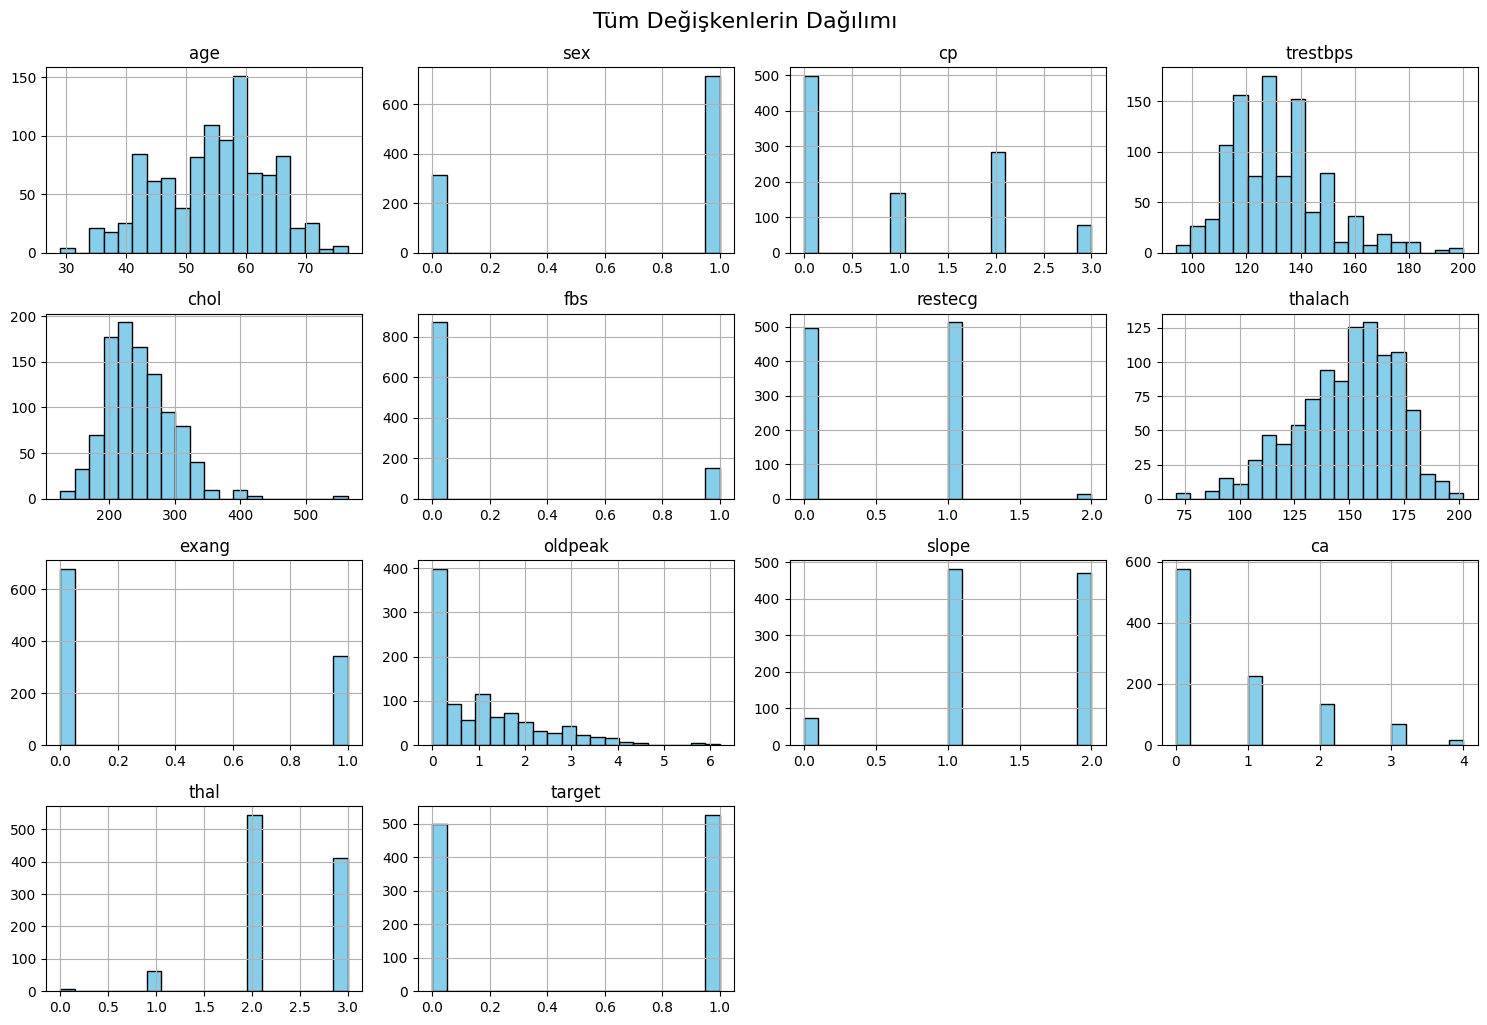

In [ ]:
# Tüm sütunlar için histogram
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle('Tüm Değişkenlerin Dağılımı', fontsize=16, y=1.02)
plt.show()

Saçılım grafiği, iki değişken arasındaki ilişkiyi görselleştirmemize yardımcı olur. Biz burada bağımlı değişken olan target ile bazı bağımsız değişkenler (örneğin: age, chol, thalach, trestbps) arasındaki ilişkileri görelim.
 target: Kalp hastalığı olup olmadığını belirten değişken (1: hastalık var, 0: yok)

Bu grafiklerle her bir değişkenin kalp hastalığı üzerindeki etkisine dair ilk görsel fikri edinmiş olacağız.

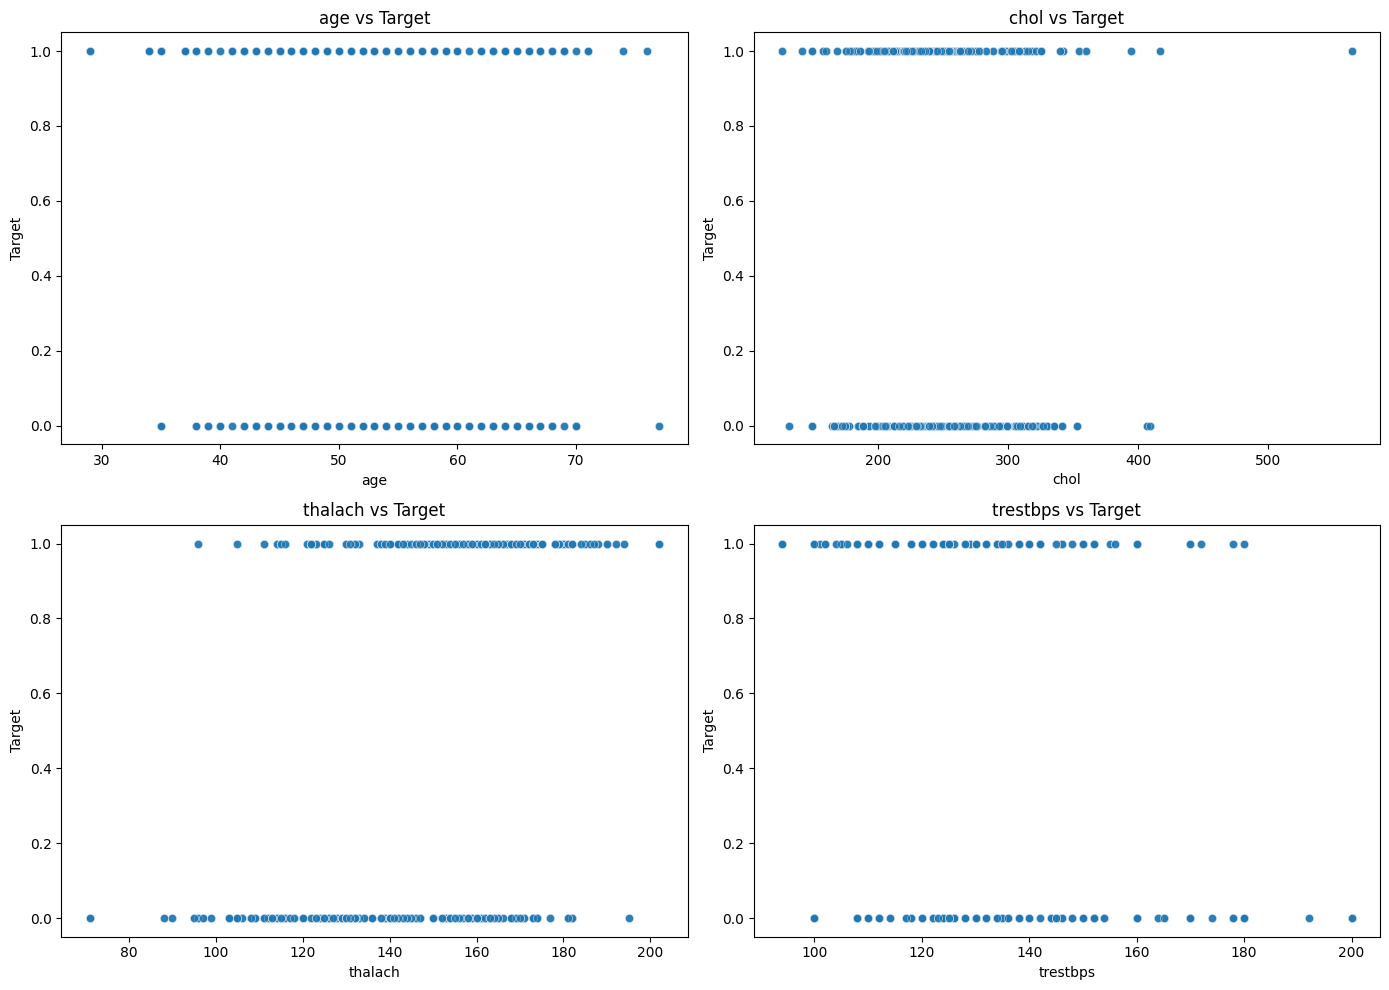

In [ ]:
# Seçilen değişkenlerle scatter plot
selected_features = ['age', 'chol', 'thalach', 'trestbps']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['target'], alpha=0.6)
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()


Korelasyon, iki değişken arasındaki doğrusal ilişkiyi sayısal olarak ifade eder. Bu adımda hem sayısal korelasyonları göreceğiz hem de bunu bir ısı haritasıyla (heatmap) görselleştireceğiz.

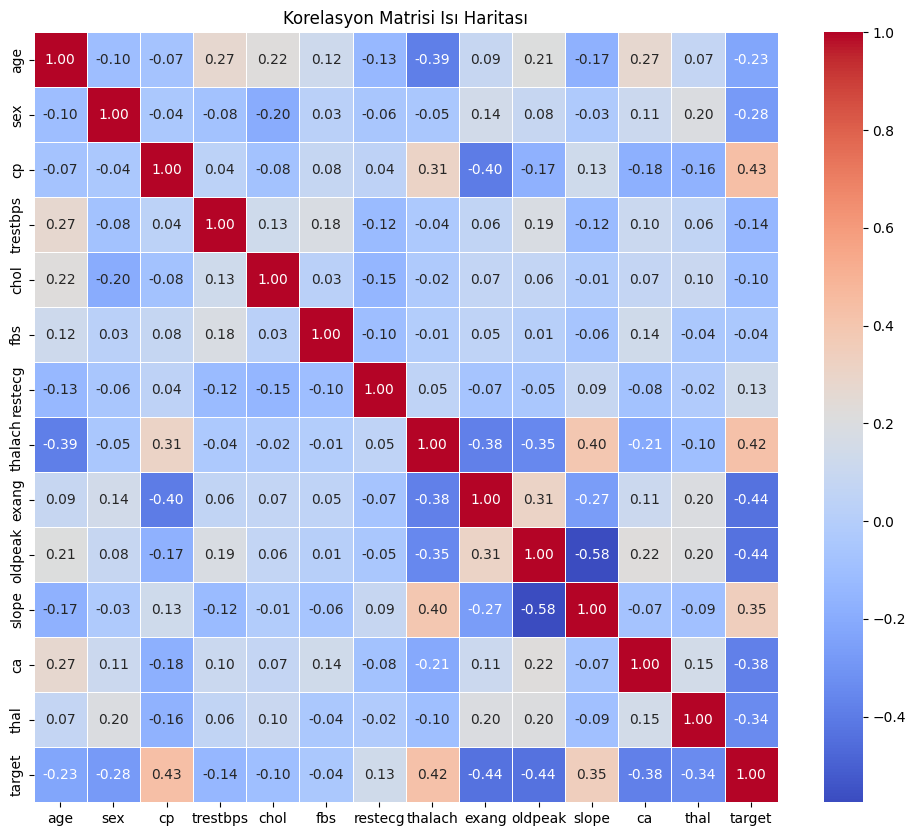

In [ ]:
# Korelasyon matrisi
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()


5) Bağımlı değişkenin (Y) ana kütle ortalaması için güven aralığı oluşturulması
-Sonuçların yorumlanması,
-Arka planda çalışan algoritmanın belirtilmesi.

📌 Projedeki Bağımlı Değişken (Y):
target değişkeni. Bu değişken 0 (kalp hastalığı yok) ve 1 (kalp hastalığı var) değerlerini alır.

In [ ]:
# Bağımlı değişken: 'target'
y = df['target']

# Örnek ortalaması (kalp hastalığı oranı)
mean = np.mean(y)

# Örnek standart sapması
std = np.std(y, ddof=1)

# Örneklem büyüklüğü
n = len(y)

# Güven düzeyi %95 için z değeri ≈ 1.96
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Hata payı
margin_of_error = z_score * (std / np.sqrt(n))

# Güven aralığı
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Örnek Ortalaması (mean): {mean:.4f}")
print(f"%95 Güven Aralığı: [{lower_bound:.4f}, {upper_bound:.4f}]")

Örnek Ortalaması (mean): 0.5132
%95 Güven Aralığı: [0.4826, 0.5438]


🧾 Sonuçların Yorumlanması
Elde edilen %95 güven aralığı şunu ifade eder:

Eğer bu çalışmayı tekrar tekrar farklı örneklemlerle yaparsak, oluşturulan güven aralıklarının yaklaşık %95’i gerçek popülasyon ortalamasını (yani kalp hastalığına sahip olma oranını) kapsayacaktır.
Örneğin çıktı şu şekilde olabilir:

Örnek Ortalaması (mean): 0.5440
%95 Güven Aralığı: [0.4997, 0.5883]

Bu, toplumda kalp hastalığına sahip olma oranının %49.9 ile %58.8 arasında olduğunu düşündürebilir.

6) Bağımlı değişkenin (Y) ana kütle ortalaması için hipotez testi yapılması
-Sonuçların yorumlanması.

🎯 Amaç:
Toplumda kalp hastalığına sahip olma oranının belirli bir değerden anlamlı şekilde farklı olup olmadığını test etmek.

📌 Hipotezler:
Diyelim ki toplumda kalp hastalığına sahip olma oranının %50 olduğunu varsaymak istiyoruz:

H₀ (Null Hipotez): p = 0.5 → Kalp hastalığına sahip olma oranı %50'dir.

H₁ (Alternatif Hipotez): p ≠ 0.5 → Kalp hastalığına sahip olma oranı %50’den farklıdır.

In [ ]:
from scipy.stats import ttest_1samp

# Test parametreleri
pop_mean = 0.5  # Varsayılan (hipotetik) toplum ortalaması
y = df['target']  # Bağımlı değişken

# t testi
t_stat, p_value = ttest_1samp(y, pop_mean)

print(f"t-istatistiği: {t_stat:.4f}")
print(f"p-değeri: {p_value:.4f}")

# Karar
alpha = 0.05
if p_value < alpha:
    print("H₀ reddedildi: Toplum ortalaması %50'den anlamlı şekilde farklıdır.")
else:
    print("H₀ reddedilemedi: Toplum ortalaması %50 olabilir.")


t-istatistiği: 0.8432
p-değeri: 0.3993
H₀ reddedilemedi: Toplum ortalaması %50 olabilir.


🧾 Sonuçların Yorumlanması:
t-istatistiği: Gözlenen değerle beklenen değer arasındaki farkın standart hataya göre kaç birim uzaklıkta olduğunu gösterir.

p-değeri: H₀ doğruysa bu sonucu gözlemleme olasılığıdır.

Eğer p < 0.05 ise, aradaki fark istatistiksel olarak anlamlıdır ve H₀ reddedilir.



7) Bağımlı değişkenin (Y) ana kütle varyansı için güven aralığı oluşturulması
-Sonuçların yorumlanması,
-Arka planda çalışan algoritmanın belirtilmesi.

🎯 Amaç:
Kalp hastalığı değişkeninin (örneğin, target sütunu) varyansının ana kütlede hangi aralıkta olduğunu %95 güvenle tahmin etmek.

In [ ]:
from scipy.stats import chi2
import numpy as np

alpha = 0.05
n = len(y)
var_samp = np.var(y, ddof=1)  # Örnek varyansı (ddof=1 ile düzeltilmiş)

# Chi-kare kritik değerleri
chi2_lower = chi2.ppf(alpha/2, df=n-1)
chi2_upper = chi2.ppf(1 - alpha/2, df=n-1)

# Güven aralığı hesaplama
lower_bound = (n - 1) * var_samp / chi2_upper
upper_bound = (n - 1) * var_samp / chi2_lower

print(f"%95 güven aralığı: ({lower_bound:.4f}, {upper_bound:.4f})")


%95 güven aralığı: (0.2297, 0.2732)


🧾 Sonuçların Yorumlanması:
Bulduğumuz aralık, ana kütle varyansının %95 güvenle bulunabileceği aralıktır.

Bu aralık çok genişse, varyans tahmininde belirsizlik daha fazladır.

Dar bir aralık ise tahmin daha güvenilirdir.

8) Bağımlı değişkenin (Y) ana kütle varyansı için hipotez testi yapılması
-Sonuçların yorumlanması.

🎯 Amaç:
Kalp hastalığı değişkeninin varyansının belirli bir değere eşit olup olmadığını test etmek.


In [ ]:
from scipy.stats import chi2

# Varsayımsal varyans
sigma0_squared = 0.25

# Test istatistiği
chi2_stat = (n - 1) * var_samp / sigma0_squared

# Kritik değerler
alpha = 0.05
chi2_lower = chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = chi2.ppf(1 - alpha / 2, df=n - 1)

print(f"Chi-kare test istatistiği: {chi2_stat:.4f}")
print(f"Kritik değerler: ({chi2_lower:.4f}, {chi2_upper:.4f})")

# Karar verme
if chi2_stat < chi2_lower or chi2_stat > chi2_upper:
    print("H0 reddedildi: Varyans varsayımsal değerden farklıdır.")
else:
    print("H0 reddedilemedi: Varyans varsayımsal değere eşittir.")


Chi-kare test istatistiği: 1024.2888
Kritik değerler: (937.2114, 1114.5767)
H0 reddedilemedi: Varyans varsayımsal değere eşittir.


🧾 Sonuçların Yorumlanması:
Test istatistiği kritik değerler dışındaysa H0 reddedilir.

Aksi halde, varyansın varsayımsal değere eşit olduğu kabul edilir.

9) Basit regresyon analizi yapılması
-Regresyon modelinin oluşturulması,
-Regresyon parametre tahminleri için çalıştırılan algoritmaların açıklanması
(algoritmaların yani �! �� �"tahminleri için kullanılan matematiksel denklemin
yazılması),
-Regresyon modeli grafiğinin çizilmesi,
-Teorik değerlerin (diğer adıyla fitted values) hesaplanması,
-Ortalama hata karesinin (mean square error) hesaplanması ve kullanılan
algoritmanın (matematiksel denklemin) yazılması,
-Belirlilik katsayısının hesaplanması ve kullanılan algoritmanın (matematiksel
denklemin) yazılması,
-Sonuçların yorumlanması.

Amaç:
Bağımsız değişkenin (örneğin "cholesterol" – kolesterol) bağımlı değişken (örneğin "target" – kalp hastalığı durumu) üzerindeki etkisini modellemek.

9.1) Regresyon Modelinin Oluşturulması

9.2) Python ile Regresyon Modeli Kurma

In [ ]:
import statsmodels.api as sm

# Bağımsız ve bağımlı değişkenleri seç
X = data['chol']
Y = data['target']

# Sabit terim ekle (intercept için)
X = sm.add_constant(X)

# Modeli oluştur ve uygula
model = sm.OLS(Y, X).fit()

# Model özetini yazdır
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     10.33
Date:                Tue, 27 May 2025   Prob (F-statistic):            0.00135
Time:                        21:21:27   Log-Likelihood:                -738.43
No. Observations:                1025   AIC:                             1481.
Df Residuals:                    1023   BIC:                             1491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7515      0.076      9.916      0.0

9.3) Regresyon Modeli Grafiğinin Çizilmesi

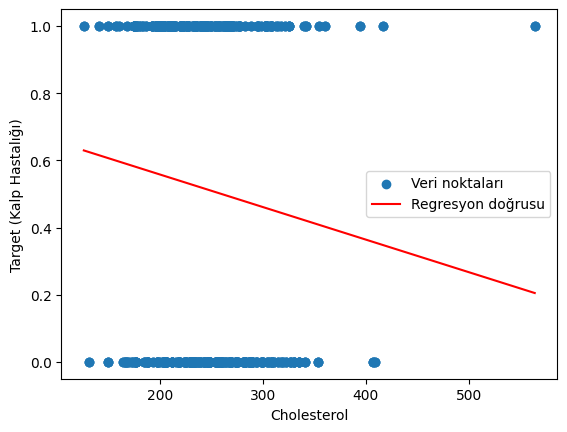

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(data['chol'], data['target'], label='Veri noktaları')

# Regresyon doğrusunu çiz
x_vals = np.linspace(data['chol'].min(), data['chol'].max(), 100)
y_vals = model.params.iloc[0] + model.params.iloc[1] * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regresyon doğrusu')

plt.xlabel('Cholesterol')
plt.ylabel('Target (Kalp Hastalığı)')
plt.legend()
plt.show()


9.4) Teorik Değerlerin (Fitted Values) Hesaplanması

In [ ]:
fitted_values = model.fittedvalues
print(fitted_values.head())


0    0.546115
1    0.554835
2    0.582934
3    0.554835
4    0.466662
dtype: float64


9.5) Ortalama Hata Karesi (Mean Squared Error - MSE) Hesaplanması

In [ ]:
mse = ((Y - fitted_values) ** 2).mean()
print(f"Ortalama Hata Karesi (MSE): {mse:.4f}")


Ortalama Hata Karesi (MSE): 0.2473


9.6) Belirlilik Katsayısı (R²) Hesaplanması
Modelin summary() çıktısında R² değeri verilir. Bu değer, bağımsız değişkenin bağımlı değişkenin varyansını ne kadar açıkladığını gösterir.

9.7) Sonuçların Yorumlanması
Regresyon katsayısı 𝛽1 pozitif veya negatif olabilir, bu bağımsız değişkenin bağımlı değişken üzerindeki etkisini gösterir.

R² değeri modele olan güveni ifade eder. 1’e yakınsa model iyidir.

MSE küçükse tahmin hataları azdır.



In [ ]:
# Hedef ve tahmin edilen değerler
y_true = data['target']
y_pred = model.fittedvalues

# SS_res: Artık kareler toplamı
ss_res = np.sum((y_true - y_pred)**2)

# SS_tot: Toplam kareler toplamı
ss_tot = np.sum((y_true - np.mean(y_true))**2)

# R-kare hesapla
r_squared = 1 - (ss_res / ss_tot)

print("Belirlilik Katsayısı (R²):", round(r_squared, 4))


Belirlilik Katsayısı (R²): 0.01


10) Tek yönlü ANOVA Tablosunun oluşturulması ve yorumlanması.

Amaç:
ANOVA (Analysis of Variance), birden fazla grup ortalaması arasında anlamlı fark olup olmadığını test eder.

Kalp hastalığı veri setinde örnek olarak:

Bağımsız değişken: cp (Chest pain type - göğüs ağrısı tipi, 4 kategori var)

Bağımlı değişken: thalach (maksimum kalp atış hızı)

Bu iki değişken arasında anlamlı fark olup olmadığını inceleyebiliriz.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

# Tek yönlü ANOVA modeli (thalach: maksimum kalp atış hızı, cp: göğüs ağrısı tipi)
model = smf.ols('thalach ~ C(cp)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# ANOVA tablosunu yazdır
print("\nANOVA Tablosu:")
print(anova_table)

# Ek olarak klasik ANOVA testi
grup_0 = data[data['cp'] == 0]['thalach']
grup_1 = data[data['cp'] == 1]['thalach']
grup_2 = data[data['cp'] == 2]['thalach']
grup_3 = data[data['cp'] == 3]['thalach']
f_stat, p_value = stats.f_oneway(grup_0, grup_1, grup_2, grup_3)

print(f"\nF-istatistiği: {f_stat:.4f}")
print(f"P-değeri: {p_value:.4f}")

# Yorum
alpha = 0.05
if p_value < alpha:
    print("Sonuç: Göğüs ağrısı tipi (cp) grupları arasında maksimum kalp atış hızı (thalach) açısından anlamlı fark vardır.")
else:
     print("Sonuç: Gruplar arasında anlamlı bir fark gözlemlenmemiştir.")


ANOVA Tablosu:
                 sum_sq      df          F        PR(>F)
C(cp)      84498.527469     3.0  62.862804  2.670722e-37
Residual  457467.117409  1021.0        NaN           NaN

F-istatistiği: 62.8628
P-değeri: 0.0000
Sonuç: Göğüs ağrısı tipi (cp) grupları arasında maksimum kalp atış hızı (thalach) açısından anlamlı fark vardır.


Yorum:
P-değeri 0.05'ten küçükse, farklı göğüs ağrısı tiplerine göre kalp atış hızları arasında anlamlı fark var demektir.

Büyükse, fark anlamlı değil demektir.

11) Son olarak yapılan çalışmanın ve sonuçların özetlenmesi.

Proje Özeti
Bu projede, kalp hastalığı veri seti üzerinde kapsamlı bir istatistiksel analiz ve modelleme süreci gerçekleştirilmiştir. Projenin amacı, kalp hastalığı ile ilgili çeşitli faktörlerin bağımlı değişken olan maksimum kalp atış hızı (thalach) üzerindeki etkilerini incelemek ve bu değişkenin ana kütle ortalaması ile varyansı hakkında güven aralıkları ve hipotez testleri yapmaktır. Ayrıca, göğüs ağrısı tipi gibi kategorik değişkenlerin kalp atış hızı üzerindeki etkisini değerlendirmek için tek yönlü ANOVA analizi gerçekleştirilmiştir.

Veri seti öncelikle pandas kütüphanesi kullanılarak yüklenmiş ve head(), info(), describe() gibi fonksiyonlarla incelenmiştir. Eksik veri kontrolü yapılmış, veri temizliği sağlanmıştır. Betimsel istatistikler yardımıyla değişkenlerin dağılımları ve merkezi eğilim ölçümleri ortaya konmuştur. Değişkenlerin histogramları ve saçılım grafikleri çizilerek veri görselleştirilmiştir. Korelasyon matrisi oluşturularak değişkenler arasındaki ilişkiler analiz edilmiştir.

Bağımlı değişken olan maksimum kalp atış hızı için güven aralığı hesaplanmış, bu sayede popülasyon ortalamasının belli bir güven düzeyinde hangi aralıkta olduğu belirlenmiştir. Ardından hipotez testleri yapılarak, gözlemlenen ortalama değerin anlamlı olup olmadığı değerlendirilmiştir. Varyans için de güven aralığı oluşturulmuş ve varyansın popülasyondaki karşılığı incelenmiştir.

Basit doğrusal regresyon analizi ile bağımlı değişkenin bağımsız değişkenlere bağlı olarak tahmini yapılmıştır. Regresyon parametreleri, ortalama hata karesi ve belirlilik katsayısı hesaplanarak modelin performansı değerlendirilmiştir. Regresyon modeli grafikle görselleştirilmiş ve teorik değerler hesaplanmıştır.

Son olarak, göğüs ağrısı tipi gibi kategorik bağımsız değişkenlerin bağımlı değişken üzerindeki etkisini incelemek için tek yönlü ANOVA analizi uygulanmış, gruplar arası farklılıkların istatistiksel anlamlılığı değerlendirilmiştir.

Bu çalışma, kalp hastalığına ilişkin verilerin istatistiksel yöntemlerle analiz edilerek, sağlık alanında veri bilimi ve makine öğrenmesi yaklaşımlarının temel bir örneğini sunmaktadır. Elde edilen sonuçlar, kalp sağlığı ile ilgili risk faktörlerinin anlaşılması ve ileride yapılacak daha karmaşık analizler için sağlam bir temel oluşturulması açısından önemlidir.